In [1]:
# need to be in the clim-recal root director
import os
os.chdir('../')

In [2]:
import matplotlib.pyplot as plt
from python.load_data.data_loader import load_data

In [3]:
scotland = 'data/Scotland/Scotland.bbox.shp'
date_period = ('1980-01-01', '2000-01-01')
variable = 'tasmax'

In [4]:
%timeit 
input_files = '/Users/crangelsmith/Projects/DyME_sandbox/tasmax/tasmax/day/'

hads = load_data(input_files, date_range=date_period, variable=variable, shapefile_path=scotland)

In [5]:
print (hads)

<xarray.Dataset>
Dimensions:                  (time: 7306, projection_y_coordinate: 304,
                              projection_x_coordinate: 211)
Coordinates:
  * time                     (time) datetime64[ns] 1980-01-01T12:00:00 ... 20...
    latitude                 (projection_y_coordinate, projection_x_coordinate) float64 ...
    longitude                (projection_y_coordinate, projection_x_coordinate) float64 ...
  * projection_x_coordinate  (projection_x_coordinate) float64 7.519e+03 ... ...
  * projection_y_coordinate  (projection_y_coordinate) float64 1.198e+06 ... ...
    transverse_mercator      int64 0
Data variables:
    tasmax                   (time, projection_y_coordinate, projection_x_coordinate) float64 ...


In [6]:
input_files = 'data/tasmax/'
ext = 'tif'
%timeit 
ukcp = load_data(input_files, date_range=date_period, variable=variable, shapefile_path=scotland, extension=ext)

File: data/tasmax/tasmax_rcp85_land-cpm_uk_2.2km_01_day_19821201-19831130.tif is needs rasterio library, trying...
File: data/tasmax/tasmax_rcp85_land-cpm_uk_2.2km_01_day_19831201-19841130.tif is needs rasterio library, trying...
File: data/tasmax/tasmax_rcp85_land-cpm_uk_2.2km_01_day_19801201-19811130.tif is needs rasterio library, trying...
File: data/tasmax/tasmax_rcp85_land-cpm_uk_2.2km_01_day_19811201-19821130.tif is needs rasterio library, trying...


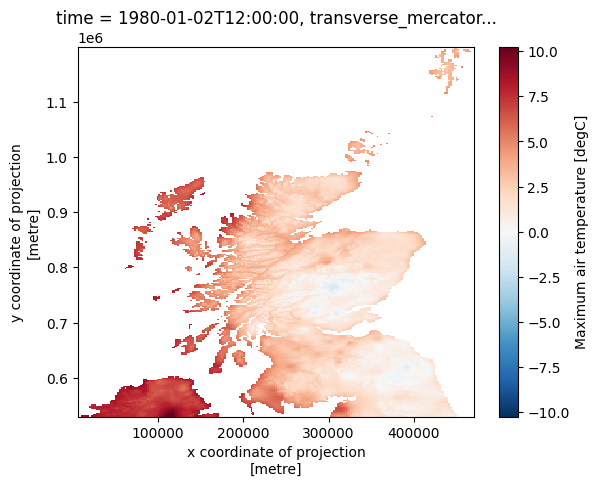

In [7]:
hads['tasmax'].isel(time=1).plot()

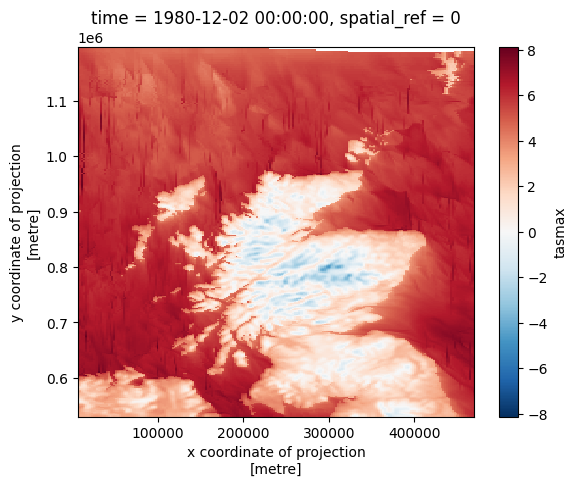

In [8]:
ukcp.where(ukcp['tasmax']<1000)['tasmax'].isel(time=1).plot()

NameError: name 'had' is not defined

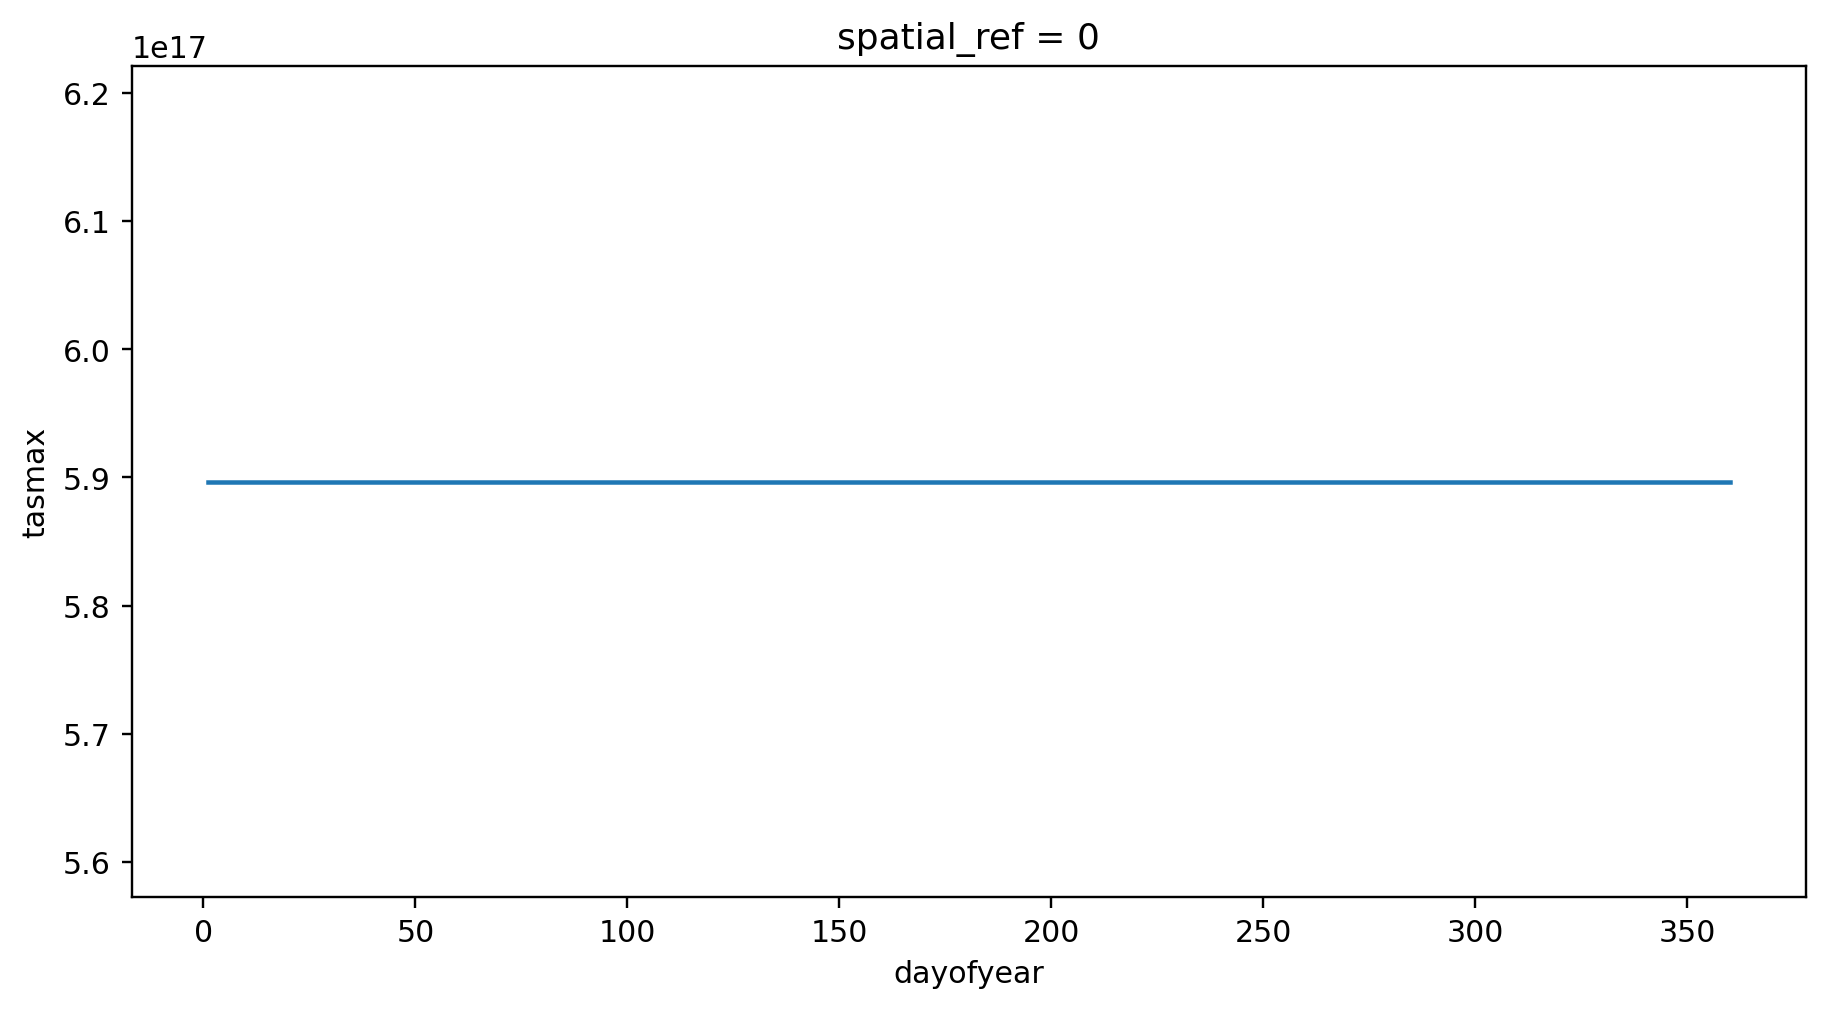

In [9]:
plt.figure(figsize=(10,5),dpi=216)
ukcp['tasmax'].groupby('time.dayofyear').mean(...).plot(label='$T_{sim,h}$')
had['tasmax'].groupby('time.dayofyear').mean(...).plot(label='$T_{obs,h}$')
#simp['tasmax'].groupby('time.dayofyear').mean(...).plot(label='$T_{sim,p}$')

plt.title('Historical modeled and obseved temperatures between December 1980 and November 1981')#; and predicted temperatures')
plt.gca().grid(alpha=.3)
plt.legend();